### Titanic Project

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"C:\Users\ACER\Downloads\Titanic-Dataset.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.dropna(inplace = True)

In [9]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [10]:
df.reset_index(inplace = True)

#### here survived will be our target column 0- dead and 1 for alive

In [11]:
df["Pclass"].value_counts()

Pclass
1    158
2     15
3     10
Name: count, dtype: int64

In [12]:
df["Survived"].value_counts()

Survived
1    123
0     60
Name: count, dtype: int64

In [13]:
df["Sex"].value_counts()

Sex
male      95
female    88
Name: count, dtype: int64

In [14]:
df.groupby("Sex")["Age"].mean()

Sex
female    32.676136
male      38.451789
Name: Age, dtype: float64

In [15]:
df["SibSp"].value_counts()

SibSp
0    110
1     64
2      6
3      3
Name: count, dtype: int64

In [16]:
df["Parch"].value_counts()

Parch
0    122
1     37
2     23
4      1
Name: count, dtype: int64

In [17]:
df["Ticket"].value_counts()

Ticket
113760      4
19950       4
PC 17582    3
35273       3
24160       3
           ..
113784      1
113043      1
28551       1
36928       1
111369      1
Name: count, Length: 127, dtype: int64

In [18]:
df.groupby("Sex")["Fare"].sum()

Sex
female    7832.0792
male      6566.8126
Name: Fare, dtype: float64

In [19]:
df["Cabin"].value_counts()

Cabin
G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
C124           1
C32            1
E34            1
C148           1
Name: count, Length: 133, dtype: int64

In [20]:
df["Embarked"].value_counts()

Embarked
S    116
C     65
Q      2
Name: count, dtype: int64

In [21]:
pd.crosstab(df["Sex"],df["Survived"])

Survived,0,1
Sex,,
female,6,82
male,54,41


### from the above we can conclude that passenger id ,name,cabin,ticket these are the columns are not correlated with the survived column so we can drop it

In [22]:
df.drop(columns = ["PassengerId","Name","Cabin","Ticket"],inplace = True)

In [23]:
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,female,38.0,1,0,71.2833,C
1,3,1,1,female,35.0,1,0,53.1000,S
2,6,0,1,male,54.0,0,0,51.8625,S
3,10,1,3,female,4.0,1,1,16.7000,S
4,11,1,1,female,58.0,0,0,26.5500,S


In [24]:
df["Sex"] =df["Sex"].map({"male":1,"female":0})

In [25]:
df["Embarked"] = df["Embarked"].map({"S":0,"Q":1,"C":2})

In [26]:
df.head()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,1,0,38.0,1,0,71.2833,2
1,3,1,1,0,35.0,1,0,53.1000,0
2,6,0,1,1,54.0,0,0,51.8625,0
3,10,1,3,0,4.0,1,1,16.7000,0
4,11,1,1,0,58.0,0,0,26.5500,0


In [27]:
nums_col =  [ i for i in df.columns if df[i].dtype !="O"]

In [28]:
nums_col

['index',
 'Survived',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked']

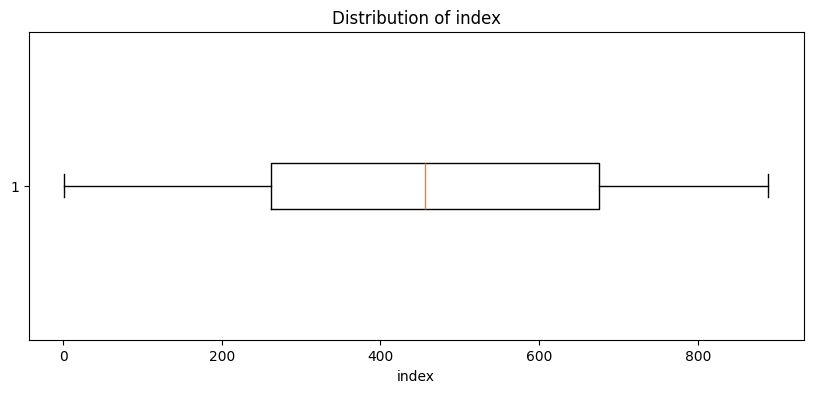

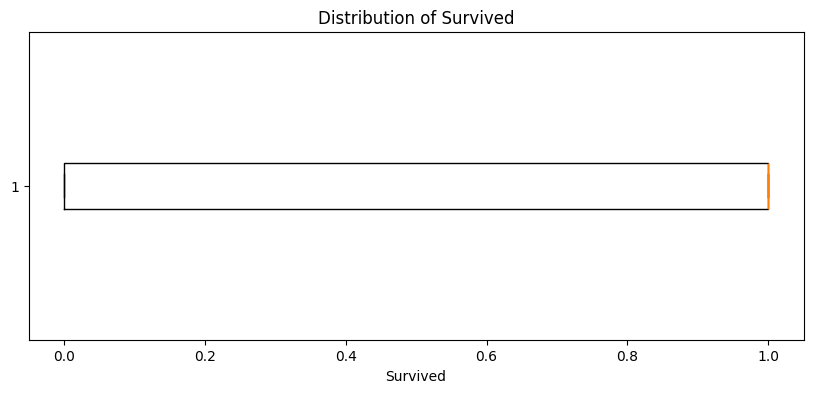

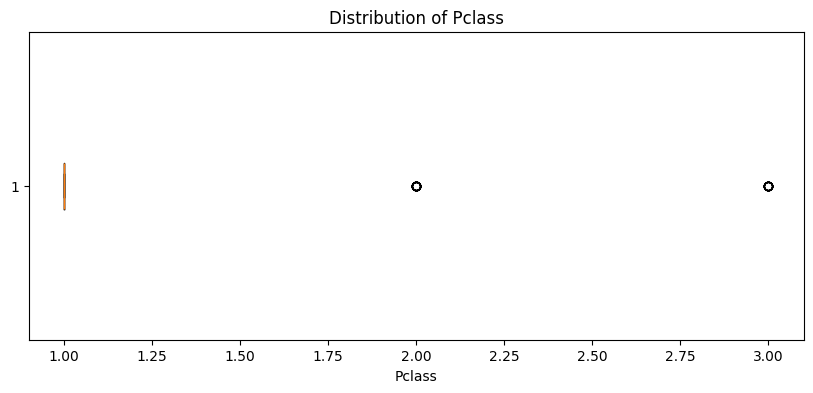

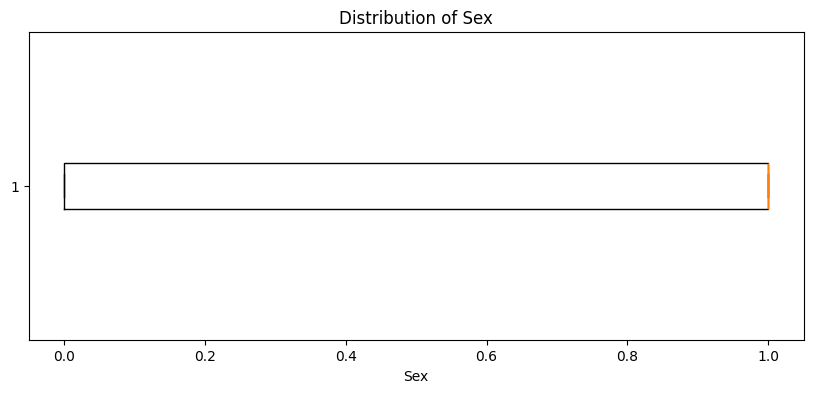

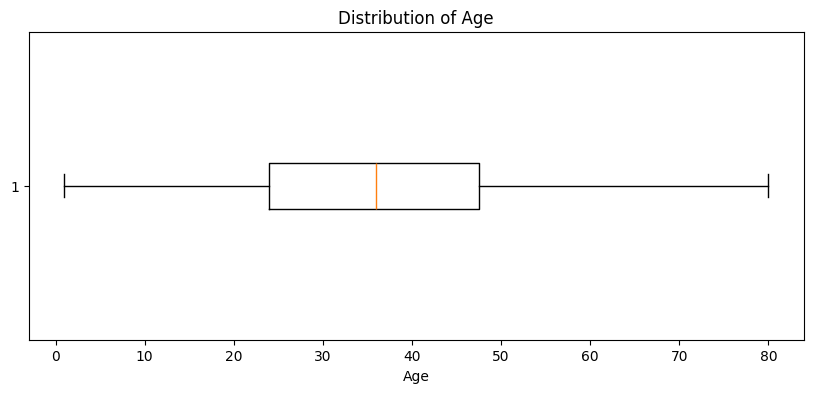

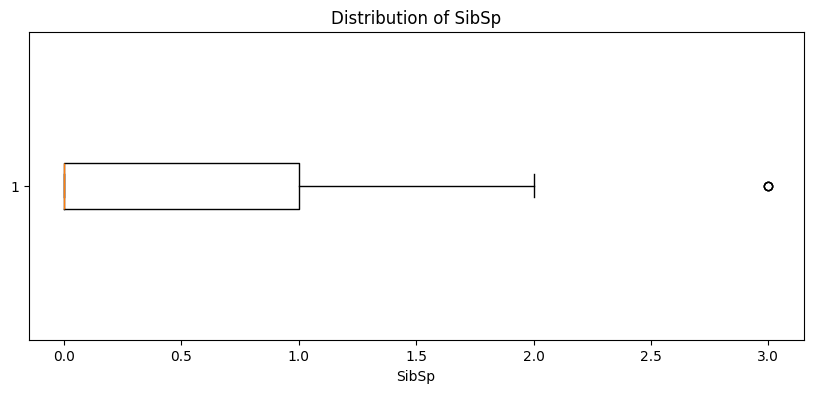

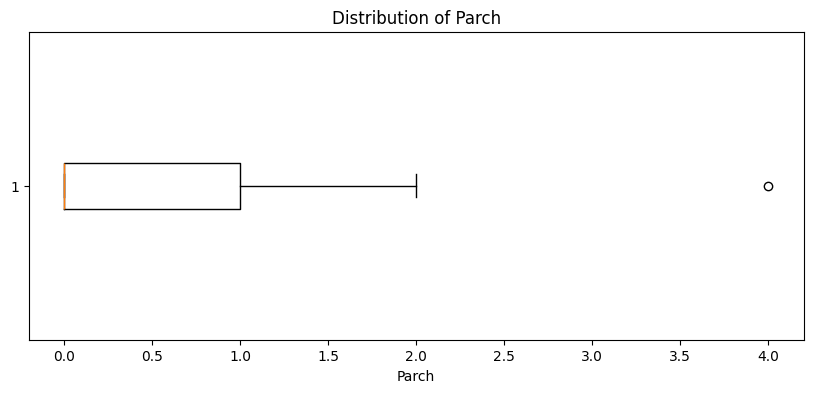

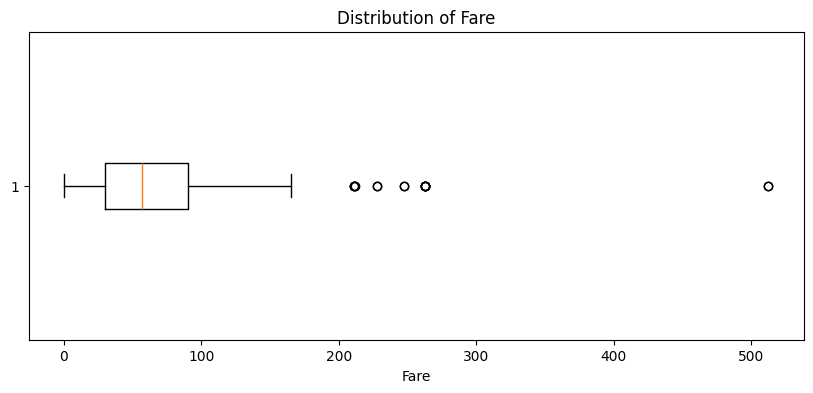

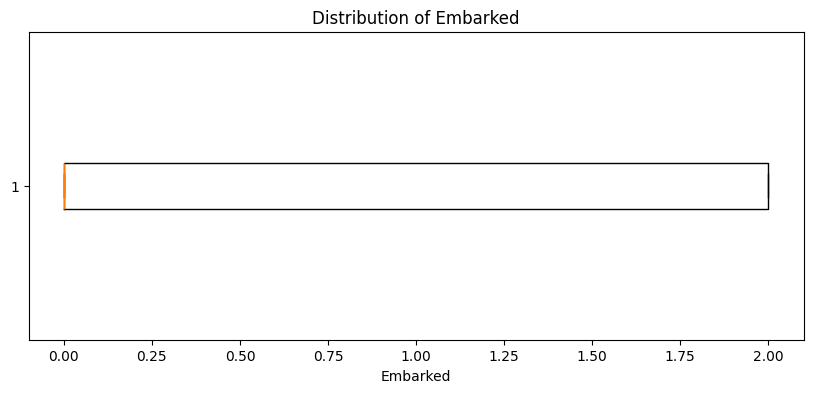

In [29]:
for i in nums_col:
    plt.figure(figsize=(10,4))
    plt.boxplot(df[i],vert = False)
    plt.xlabel(i)
    plt.title("Distribution of {}".format(i))
    plt.show()

In [30]:
df["Fare"].describe()

count    183.000000
mean      78.682469
std       76.347843
min        0.000000
25%       29.700000
50%       57.000000
75%       90.000000
max      512.329200
Name: Fare, dtype: float64

In [31]:
df["Fare"].quantile(0.93)

211.37975

In [32]:
df = df[df["Fare"]<211]

In [33]:
df.reset_index(inplace = True)

In [34]:
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,recall_score,f1_score,precision_score


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
scaler = StandardScaler()

In [38]:
X= df.drop("Survived",axis = 1)
y = df["Survived"]

In [39]:
X_tr,X_te,y_tr,y_te = train_test_split(X,y,train_size=0.75,random_state = 234)

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_tr)
X_test_scaled = scaler.transform(X_te)

In [70]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [71]:
print(X_train_scaled)

      level_0     index    Pclass       Sex       Age     SibSp     Parch  \
0   -0.105914 -0.038321  3.509437  0.930415 -0.280723 -0.776677 -0.598611   
1    0.781964  0.787413 -0.407345  0.930415  1.490839 -0.776677 -0.598611   
2   -0.401873 -0.430123 -0.407345  0.930415 -0.463988  1.021186 -0.598611   
3    1.117385  1.107596 -0.407345  0.930415 -0.097458 -0.776677 -0.598611   
4    0.683311  0.644174 -0.407345 -1.074789  0.941044  1.021186 -0.598611   
..        ...       ...       ...       ...       ...       ...       ...   
120 -1.664634 -1.803538  3.509437 -1.074789 -1.991196  1.021186  0.840358   
121  1.768496  1.806942 -0.407345  0.930415 -0.341811 -0.776677 -0.598611   
122  0.308429  0.311352 -0.407345  0.930415 -0.036370 -0.776677 -0.598611   
123 -0.263759 -0.303735 -0.407345 -1.074789  1.429750  1.021186 -0.598611   
124  1.729034  1.764813 -0.407345  0.930415  0.879955 -0.776677 -0.598611   

         Fare  Embarked  
0   -1.314385 -0.692388  
1   -0.686625 -0.692388

In [72]:
print(X_test_scaled)

     level_0     index    Pclass       Sex       Age     SibSp     Parch  \
0   1.571189  1.507824 -0.407345 -1.074789  0.757779 -0.776677 -0.598611   
1  -1.408135 -1.437013 -0.407345  0.930415 -0.830518 -0.776677  0.840358   
2  -0.697833 -0.615492  1.551046  0.930415 -0.036370 -0.776677 -0.598611   
3   0.900348  0.880098 -0.407345  0.930415  1.185397 -0.776677 -0.598611   
4   1.038462  1.061254 -0.407345  0.930415 -0.341811  1.021186 -0.598611   
5  -1.309482 -1.323264 -0.407345  0.930415  1.063220 -0.776677  0.840358   
6  -0.539988 -0.505956 -0.407345 -1.074789 -0.341811 -0.776677  2.279328   
7   1.669842  1.621573  3.509437 -1.074789 -0.586164 -0.776677  0.840358   
8   1.709304  1.747961 -0.407345 -1.074789 -1.258136 -0.776677  0.840358   
9  -1.013523 -0.939888 -0.407345 -1.074789 -0.341811  1.021186 -0.598611   
10  1.867149  1.899627 -0.407345  0.930415 -0.647253 -0.776677 -0.598611   
11  0.367621  0.345056 -0.407345 -1.074789 -0.402899 -0.776677 -0.598611   
12 -1.565980

<Axes: >

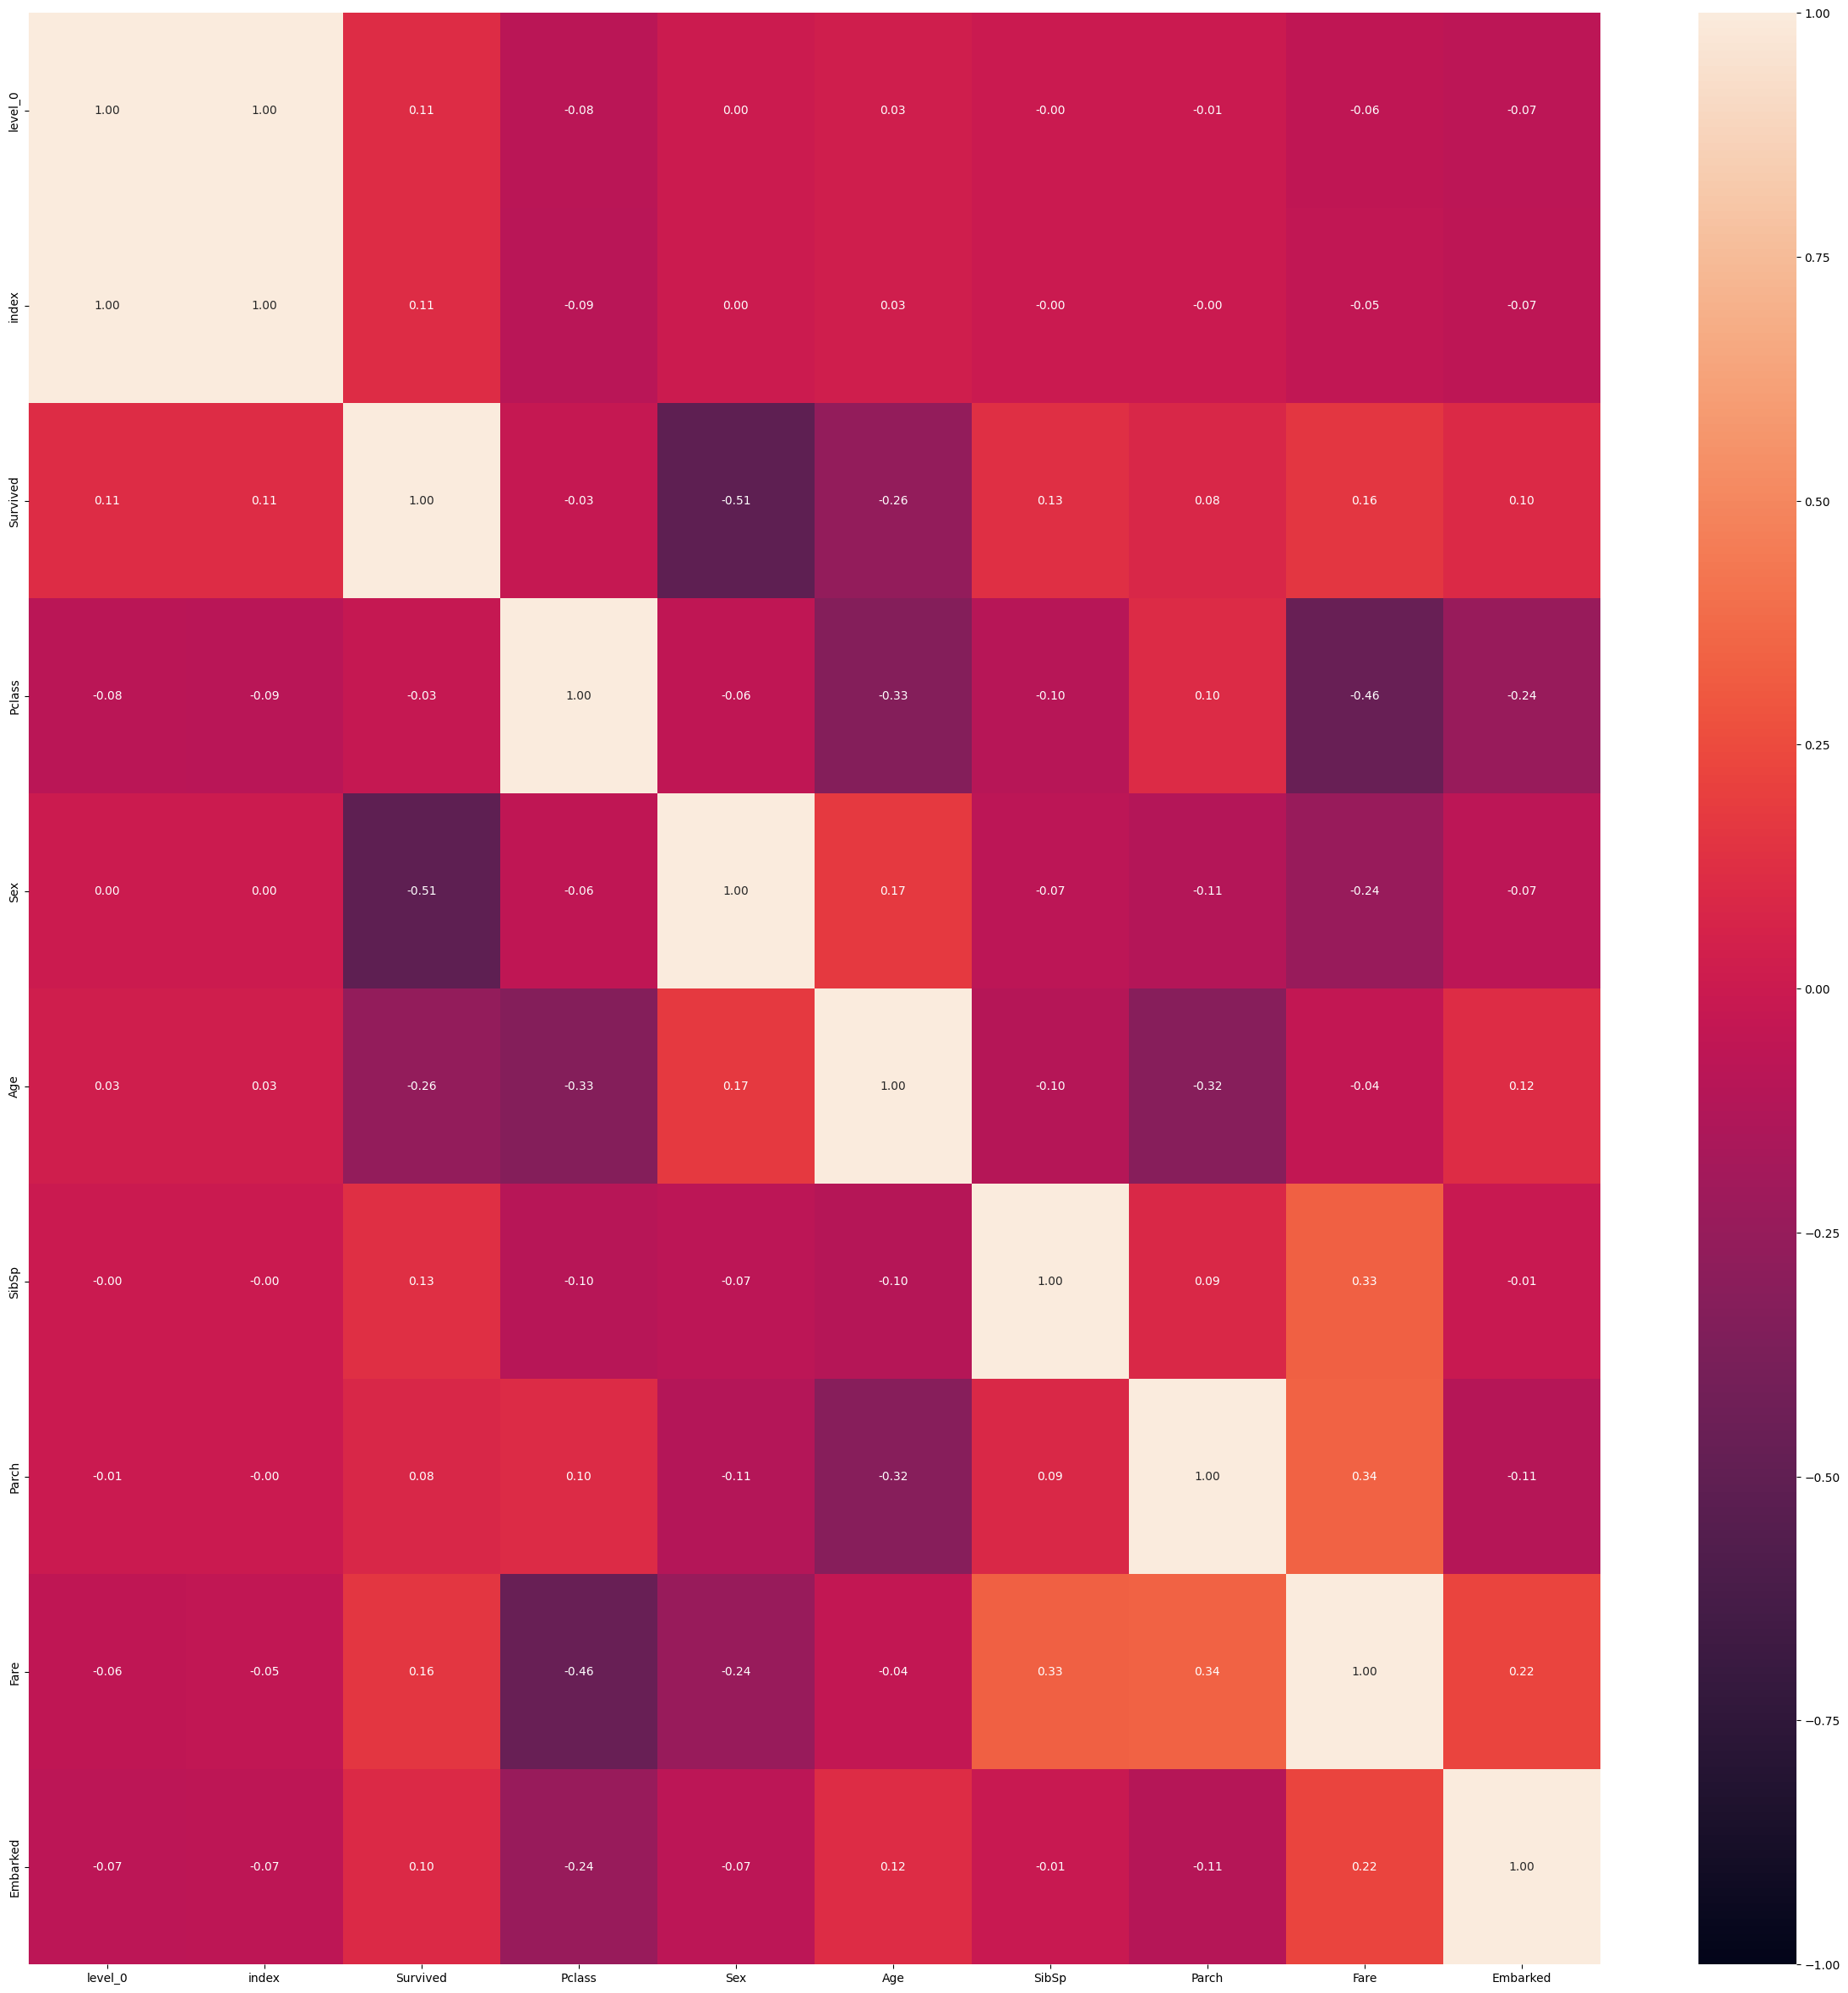

In [73]:
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),annot = True,fmt= ".2f",vmax = 1 ,vmin = -1)

In [77]:
log = LogisticRegression()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors = 11)
lsvc = SVC(kernel = "linear")
psvc = SVC(kernel = "poly")
rsvc = SVC(kernel = "rbf")
rf = RandomForestClassifier(n_estimators = 150,n_jobs = -1)
ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=150)

In [78]:
log.fit(X_tr,y_tr)
dt.fit(X_tr,y_tr)
knn.fit(X_tr,y_tr)
lsvc.fit(X_tr,y_tr)
psvc.fit(X_tr,y_tr)
rsvc.fit(X_tr,y_tr)
rf.fit(X_tr,y_tr)
ab.fit(X_tr,y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=150)

In [79]:
print("Logistic Score:",log.score(X_tr,y_tr))
print("Decsison Tree Score:",dt.score(X_tr,y_tr))
print("KNN Score:",knn.score(X_tr,y_tr))
print("Linera SVC Score:",lsvc.score(X_tr,y_tr))
print("poly svc Score:",psvc.score(X_tr,y_tr))
print("rbf svc Score:",rsvc.score(X_tr,y_tr))
print("Random Forest Score:",rf.score(X_tr,y_tr))
print("Adaboost Score:",ab.score(X_tr,y_tr))

Logistic Score: 0.784
Decsison Tree Score: 1.0
KNN Score: 0.712
Linera SVC Score: 0.776
poly svc Score: 0.656
rbf svc Score: 0.656
Random Forest Score: 1.0
Adaboost Score: 1.0


In [80]:
print("Logistic Accuracy:",accuracy_score(y_te,log.predict(X_te)))
print("Decision Tree Accuracy:",accuracy_score(y_te,dt.predict(X_te)))
print("KNN Accuracy:",accuracy_score(y_te,knn.predict(X_te)))
print("LINEAR SVC Accuracy:",accuracy_score(y_te,lsvc.predict(X_te)))
print("POLY SVC Accuracy:",accuracy_score(y_te,psvc.predict(X_te)))
print("RBF SVC Accuracy:",accuracy_score(y_te,rsvc.predict(X_te)))
print("random forest Accuracy:",accuracy_score(y_te,rf.predict(X_te)))
print("Adaboost Accuracy:",accuracy_score(y_te,ab.predict(X_te)))

Logistic Accuracy: 0.7857142857142857
Decision Tree Accuracy: 0.7142857142857143
KNN Accuracy: 0.7142857142857143
LINEAR SVC Accuracy: 0.7380952380952381
POLY SVC Accuracy: 0.6904761904761905
RBF SVC Accuracy: 0.6904761904761905
random forest Accuracy: 0.6904761904761905
Adaboost Accuracy: 0.6666666666666666


### here decision tree is giving more accurate values than other models